In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 01 - Problem (case study)

## 02 - Getting Data

In [2]:
# Import of customer marketing analysisfile and setting df as "Mktcus"

mktcus = pd.read_csv("marketing_customer_analysis.csv")

## 03 - Cleaning/Wrangling/EDA

In [3]:
#1/ Header check

list(mktcus.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [4]:
#1.1/ Changing header names
mktcus.columns = mktcus.columns.str.replace(' ','')
mktcus.columns = mktcus.columns.str.lower()

list(mktcus.columns)

['customer',
 'state',
 'customerlifetimevalue',
 'response',
 'coverage',
 'education',
 'effectivetodate',
 'employmentstatus',
 'gender',
 'income',
 'locationcode',
 'maritalstatus',
 'monthlypremiumauto',
 'monthssincelastclaim',
 'monthssincepolicyinception',
 'numberofopencomplaints',
 'numberofpolicies',
 'policytype',
 'policy',
 'renewoffertype',
 'saleschannel',
 'totalclaimamount',
 'vehicleclass',
 'vehiclesize']

In [5]:
#2.1/ Deal with NaN values
print(mktcus.isnull().sum())

customer                      0
state                         0
customerlifetimevalue         0
response                      0
coverage                      0
education                     0
effectivetodate               0
employmentstatus              0
gender                        0
income                        0
locationcode                  0
maritalstatus                 0
monthlypremiumauto            0
monthssincelastclaim          0
monthssincepolicyinception    0
numberofopencomplaints        0
numberofpolicies              0
policytype                    0
policy                        0
renewoffertype                0
saleschannel                  0
totalclaimamount              0
vehicleclass                  0
vehiclesize                   0
dtype: int64


In [6]:
#2.2/ Categorical Features
(mktcus.select_dtypes("object")).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   effectivetodate   9134 non-null   object
 6   employmentstatus  9134 non-null   object
 7   gender            9134 non-null   object
 8   locationcode      9134 non-null   object
 9   maritalstatus     9134 non-null   object
 10  policytype        9134 non-null   object
 11  policy            9134 non-null   object
 12  renewoffertype    9134 non-null   object
 13  saleschannel      9134 non-null   object
 14  vehicleclass      9134 non-null   object
 15  vehiclesize       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [7]:
#2.3/ Numerical Features
(mktcus.select_dtypes("number")).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerlifetimevalue       9134 non-null   float64
 1   income                      9134 non-null   int64  
 2   monthlypremiumauto          9134 non-null   int64  
 3   monthssincelastclaim        9134 non-null   int64  
 4   monthssincepolicyinception  9134 non-null   int64  
 5   numberofopencomplaints      9134 non-null   int64  
 6   numberofpolicies            9134 non-null   int64  
 7   totalclaimamount            9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


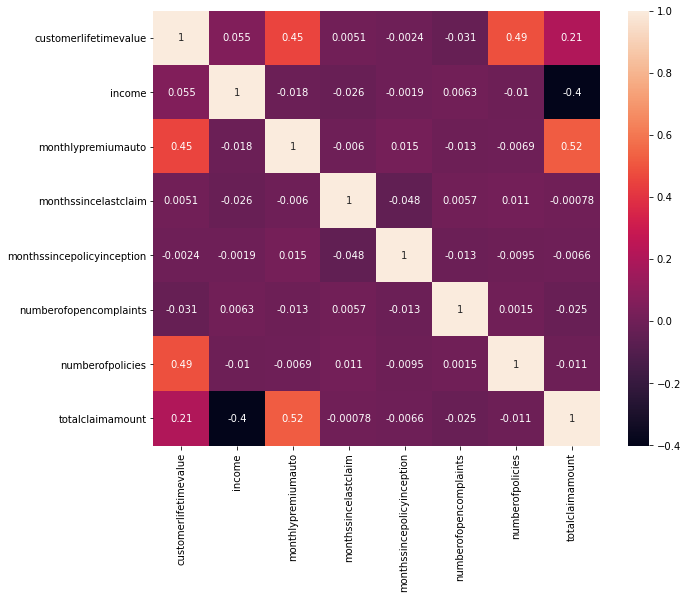

In [63]:
#Checking for multicollinearity
corr_matrix = mktcusNUM.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# Dropping unnesccary columns "customer" and "effectivetodate"
mktcus = mktcus.drop(['customer', 'effectivetodate'], axis = True)

## 04 - Processing Data

In [16]:
#Setting df for categoricals("mktcusCAT") and numericals ("mktcusNUM") only
mktcusCAT = mktcus.select_dtypes("object")
mktcusNUM = mktcus.select_dtypes("number")

In [ ]:
#1.1 Dealing with outliers (plotting numercial data "mktcusNUM")
columns = mktcusNUM.columns

for i in range(len(columns)):
    ax = sns.boxplot(x=mktcusNUM[columns[i]])
    plt.show()

In [14]:
#1.2 Identifying list of outliers
def outlierscalc(mktcusNUM):
    cols = mktcusNUM.columns
    
    for i in range(len(cols)):
        Q1 = np.quantile(mktcusNUM[cols[i]],0.25)
        Q3 = np.quantile(mktcusNUM[cols[i]],0.75)
        UW = Q3+1.5*(Q3-Q1)
        LW = Q1-1.5*(Q3-Q1)
        
        out_index = mktcusNUM[(mktcusNUM[cols[i]] < LW) |  (mktcusNUM[cols[i]] > UW)].index
        
        print("Number of outliers for", cols[i],':', len(out_index))
        
    return

In [17]:
#1.3 Number of outliers per column
outlierscalc(mktcusNUM)

Number of outliers for customerlifetimevalue : 817
Number of outliers for income : 0
Number of outliers for monthlypremiumauto : 430
Number of outliers for monthssincelastclaim : 0
Number of outliers for monthssincepolicyinception : 0
Number of outliers for numberofopencomplaints : 1882
Number of outliers for numberofpolicies : 416
Number of outliers for totalclaimamount : 453


In [28]:
#2/ Normalisation
from sklearn.preprocessing import Normalizer

In [30]:
# Using Normalizer
transformer = Normalizer().fit(mktcusNUM)
mktcusNUM_normalized = transformer.transform(mktcusNUM)

In [31]:
#return standardized data back to new numerical df "mktcusNUM2"
mktcusNUM2 = pd.DataFrame(mktcusNUM_normalized)
type(mktcusNUM2)

pandas.core.frame.DataFrame

In [32]:
mktcusNUM2.head()

,0,1,2,3,4,5,6,7
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


In [34]:
#Renaming columns
mktcusNUM2.rename(columns = {0:'customerlifetimevalue',1:'income',2:'monthlypremiumauto',3:'monthsincelastclaim',4:'monthssincepolicyinception',5:'numberofopencomplaints',6:'numberofpolicies',7:'totalclaimamount'}, inplace = True)

mktcusNUM2.head()

,customerlifetimevalue,income,monthlypremiumauto,monthsincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


In [36]:
# Import spicy stats for skew and kurtosis

from scipy.stats import skew
from scipy.stats import kurtosis

column >> customerlifetimevalue
skew 0.7885993815617972
kurtosis -1.1351367079947052


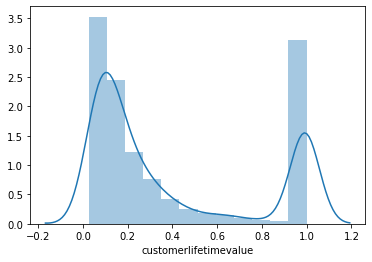

column >> income
skew -1.0742631869619956
kurtosis -0.7914955741846179


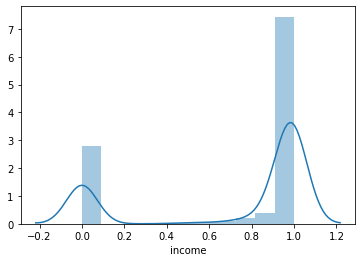

column >> monthlypremiumauto
skew 1.9222347655743866
kurtosis 2.63007068596158


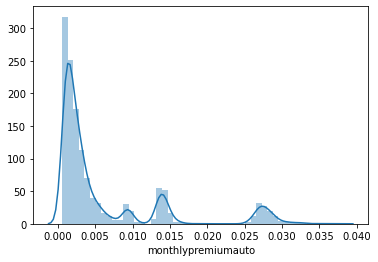

column >> monthsincelastclaim
skew 3.4888621762409677
kurtosis 14.193167086734917


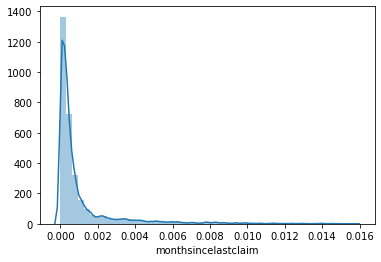

column >> monthssincepolicyinception
skew 3.2913749242743853
kurtosis 12.460491702882656


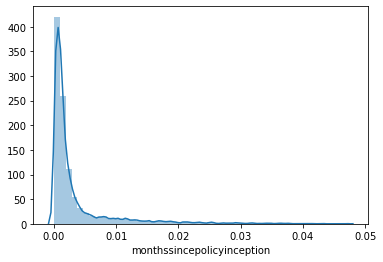

column >> numberofopencomplaints
skew 8.482505826777295
kurtosis 89.61144893577394


C:\Users\sogun\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


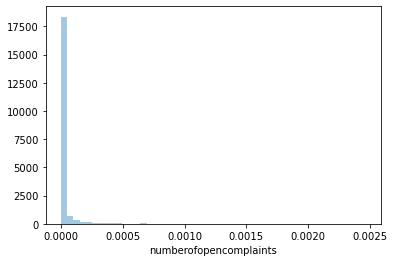

column >> numberofpolicies
skew 3.189308868533805
kurtosis 11.811819047447571


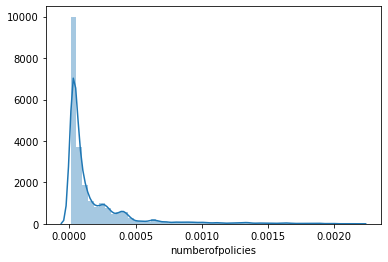

column >> totalclaimamount
skew 2.459356884824001
kurtosis 6.273432048497764


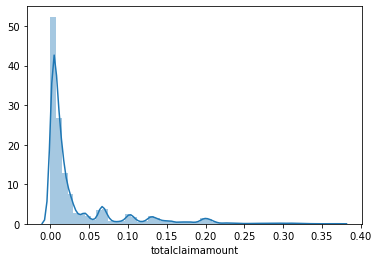

In [37]:
# plotting normalised data 

cols = mktcusNUM2.columns

for i in range(len(cols)):
    print('column >>', cols[i])
    print('skew {}'.format(skew(mktcusNUM2[cols[i]])))
    print('kurtosis {}'.format(kurtosis(mktcusNUM2[cols[i]])))
    sns.distplot(mktcusNUM2[cols[i]])
    plt.show()

In [39]:
mktcusNUM2.describe()

,customerlifetimevalue,income,monthlypremiumauto,monthsincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.393290,0.720504,0.006069,0.001063,0.003359,0.000030,0.000184,0.035091
std,0.376088,0.424612,0.007836,0.001915,0.005776,0.000140,0.000290,0.055815
min,0.024837,0.000000,0.000610,0.000000,0.000000,0.000000,0.000010,0.000001
25%,0.095641,0.000000,0.001398,0.000159,0.000591,0.000000,0.000031,0.004478
50%,0.197382,0.980231,0.002516,0.000382,0.001244,0.000000,0.000069,0.011007
75%,0.950987,0.995350,0.006256,0.000910,0.002898,0.000000,0.000219,0.032569
max,0.999975,0.999687,0.037633,0.015696,0.047142,0.002468,0.002167,0.371107


In [40]:
#3/ Encoding Categorical data
mktcusCAT.head()

,customer,state,response,coverage,education,effectivetodate,employmentstatus,gender,locationcode,maritalstatus,policytype,policy,renewoffertype,saleschannel,vehicleclass,vehiclesize
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [42]:
# Unique values
column_cat = mktcusCAT.columns

for i in range(0,len(column_cat)):
    print(mktcusCAT[column_cat[i]].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Co

In [44]:
#Removing unneccesary columns
mktcusCAT = mktcusCAT.drop(['customer','effectivetodate'], axis = True )

In [45]:
# Unique Values
column_cat = mktcusCAT.columns

for i in range(0,len(column_cat)):
    print(mktcusCAT[column_cat[i]].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [52]:
# Concatenate both 'mktcusCAT' and 'mktcusNUM2' to new df 'mktcus2'

mktcus2 = pd.concat([mktcusNUM2,mktcusCAT], axis = 1)
mktcus2.head()

,customerlifetimevalue,income,monthlypremiumauto,monthsincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount,state,response,...,employmentstatus,gender,locationcode,maritalstatus,policytype,policy,renewoffertype,saleschannel,vehicleclass,vehiclesize
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,Washington,No,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [54]:
#Transfomr Categorical data
mktcus2 = pd.get_dummies(mktcus2, drop_first = True)
mktcus2.head()

,customerlifetimevalue,income,monthlypremiumauto,monthsincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount,state_California,state_Nevada,...,saleschannel_Branch,saleschannel_Call Center,saleschannel_Web,vehicleclass_Luxury Car,vehicleclass_Luxury SUV,vehicleclass_SUV,vehicleclass_Sports Car,vehicleclass_Two-Door Car,vehiclesize_Medsize,vehiclesize_Small
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [58]:
# X - Y Split 
# Setting up Y (dependent) and X(independent) values

# Y being "totalclaimamount"
Y = mktcus2['totalclaimamount']

# X being Mktnum - "totalclaimamount" column

X = mktcus2.drop(['totalclaimamount'], axis = True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)

## 05 - Applying Linear Regression Model

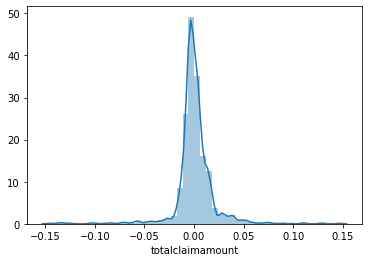

In [59]:
from sklearn.linear_model import LinearRegression
import math
model = LinearRegression()

lm = model.fit(X_train, Y_train)

predictions = lm.predict(X_test)
residuals = predictions - Y_test

sns.distplot(residuals)

## 06 - Model Validation

In [60]:
# Import of libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [61]:
# Setting Metric formulas

R2 = r2_score (Y_test,predictions)
MSE = mean_squared_error (Y_test, predictions)
RMSE = sqrt(MSE)
MAE = mean_absolute_error (Y_test, predictions)

In [62]:
# Metric Results

print("R2 Score = {:5.3f}". format(R2))
print("MSE = {:5.3f}". format(MSE))
print("RMSE = {:5.3f}". format(RMSE))
print("MAE = {:5.3f}". format(MAE))

R2 Score = 0.873
MSE = 0.000
RMSE = 0.020
MAE = 0.011
